<a href="https://colab.research.google.com/github/eliabrodsky/finance/blob/main/Options_Pricing_EB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  The Black Scholes Option Pricing Model

The Black-Scholes(/Merton) model is the most commonly used formula used to price stock options.  Given the following inputs: 
  
* C = Call option price 
* S = Current stock price
* K = Exercise price
* r = Risk-free interest rate
* $\sigma$ = Volatility (standard deviation) of the stock return
* t = Time to maturity (in years)
  
The value of a European call option is given by:


\begin{equation}
	\mathrm C= \mathrm N(\mathrm d_1)\mathrm S - \mathrm N(\mathrm d_2) \mathrm K \mathrm e^{-rt}
\end{equation}

\begin{equation}
	\mathrm d_1= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{K}\right)} + t\left(r + \frac{\sigma^2}{2} \right) \right]
\end{equation}

\begin{equation}
	\mathrm d_2= d_1 - \sigma \sqrt{\mathrm t}
\end{equation}

**Exercise 1**  
Write a Python function that takes the inputs of the formula and returns the Black Scholes value for a European call option.  Below we import the numpy and matplotlib.pyplot libraries.  We also import the stats package from scipy (Scientific Python).  
You will need to use the following functions:  
* np.sqrt(x) is the numpy formula to calculate the square root of x (works on numpy arrays)
* np.exp(x) is the numpy exponential formula-- raises e to the power of x (works on numpy arrays)
* np.log(x) is the numpy formula to calculate the nature log (ln) of x (works on numpy arrays)
* stats.norm.cdf(x) returns the cumulative normal density function of x, assuming a mean of 0 and standard deviation of 1

Where N() is the cumulative standard normal density function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def BS_Call(S,K,r,sigma,t):
    d1=1/(sigma*np.sqrt(t))*(np.log(S/K)+t*(r+sigma**2/2))
    d2=d1-sigma*np.sqrt(t)
    C=stats.norm.cdf(d1)*S-stats.norm.cdf(d2)*K*np.exp(-r*t)
    return(C)

Test the function using the following inputs:  
* S = 60
* K = 60
* r = 8%
* $\sigma$ = 30%
* t = 0.5

In [9]:
p = BS_Call(60,60,0.08,0.3,0.5)
print("The value of the European option is $", p.round(2))

The value of the European option is $ 6.23


Create a graph of the call value vs the stock price, with the stock price ranging from 30 to 70 in increments of 0.1, assuming the rest of the values are as above. 
If you used the np. and stats. functions discussed above, you should be able to create ys by simply using the Black Scholes function you created above on a numpy arange.

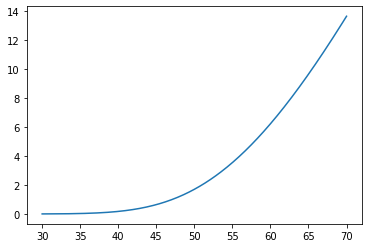

In [10]:
xs=np.arange(30,70.1,.1)
ys=BS_Call(xs,60,.08,.3,.5)
plt.plot(xs,ys)
plt.show()

**Book Question 10.28 (Modified):** Use the “Options Pricing” spreadsheet provided on Canvas to calculate the (Black-Scholes) value of an American call option on a non-dividend paying stock when the stock price is 30, the strike price is 32, the risk-free rate is 5%, the volatility is 30%, and the time to maturity is 1.5 years. 

*  S = $30
*  K = $32
*  r = 0.05
*  $\sigma$ = 0.3
*  t = 1.5


In [24]:
#input parameters here:
S = 30
K = 32
r = 0.05
sigma = 0.3
t = 1.5

#run function:
p = BS_Call(S,K,r,sigma,t)

#print results:
print("The value of the European option is $", p.round(2))

The value of the European option is $ 4.51


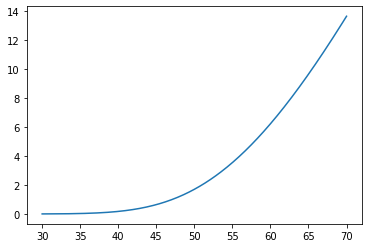

In [25]:
S=np.arange(30,70.1,.1)
p = BS_Call(S,K,r,sigma,t)
plt.plot(xs,ys)
plt.show()

## Binomial Option Pricing Model (BOPM)

https://www.csie.ntu.edu.tw/~d00922011/python/slides/options.pdf

In [39]:
import numpy as np

s = 160 # spot price
K = 150 # strike price
n = 3 # periods
R = 1.2 # gross return for each period 
u = 1.5 #sizeofupmove
d = 0.5 #sizeofdownmove
p = (R-d)/(u-d) # probability of up move

# generate the forward price tree
tree = np.zeros([n + 1, n + 1])
tree[0, 0] = s
for period in range(1, n + 1):
    for level in range(period  + 1):
        tree[level, period] = s * u ** (period-level) * d ** level

# calculate the payoff at expiration
for level in range(n + 1):
  payoff = tree[level, n]-K
  tree[level, n] = payoff if payoff > 0 else 0
# calculate the option price at time 0 by backward induction
for period in range(n-1,-1,-1):
    for level in range(period + 1):
        tree[level, period] = (p * tree[level, period + 1] + (1-p) * tree[level + 1, period + 1]) / R
print(tree)
print("c =", round(tree[0, 0], 2)) 

[[ 85.06944444 141.45833333 235.         390.        ]
 [  0.          10.20833333  17.5         30.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]
c = 85.07
